In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#notify me when a long running cell is complete
%load_ext jupyternotify
import time

<IPython.core.display.Javascript object>

In [22]:
content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])
content.head()

/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_9369/3666075594.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])


,id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [23]:
content['year'].describe()

count    17763.000000
mean      1990.263694
std         16.507891
min       1896.000000
25%       1985.000000
50%       1997.000000
75%       2002.000000
max       2005.000000
Name: year, dtype: float64

In [24]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17770 non-null  int64  
 1   year    17763 non-null  float64
 2   title   17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


# Year Release

There are a few missing years - adding those in.

I'm assuming that people identify heavily with the content that they grew up with or a certain styles of content. For that reason, I'm going to bin films by decade.

However, considering the low outliers anything before 1960 will be binned together. Q1 - 1.5IQR

In [25]:
content[content['year'].isna()]

,id,year,title
4387,4388,NaN,Ancient Civilizations: Rome and Pompeii
4793,4794,NaN,Ancient Civilizations: Land of the Pharaohs
7240,7241,NaN,Ancient Civilizations: Athens and Greece
10781,10782,NaN,Roti Kapada Aur Makaan
15917,15918,NaN,Hote Hote Pyaar Ho Gaya
16677,16678,NaN,Jimmy Hollywood
17666,17667,NaN,Eros Dance Dhamaka


In [26]:
#fix year
content.at[4387,'year']=2002
content.at[4793,'year']=2002
content.at[7240,'year']=2002
content.at[10781,'year']=1974
content.at[15917,'year']=1999
content.at[16677,'year']=1994
content.at[17666,'year']=1999

#check
content[content['year'].isna()]

,id,year,title


In [27]:
def decade(row):
    
    """
    bins years by decade, 1959 and before are binned together
    """
    if row['year'] <= 1959:
        return str(0)
    elif 1960 <= row['year'] < 1969:
        return str(1960)
    elif 1970 <= row['year'] < 1979:
        return str(1970)
    elif 1980 <= row['year'] < 1989:
        return str(1980)
    elif 1990 <= row['year'] < 1999:
        return str(1990)
    else:
        return str(2000)

In [28]:
#bin years

content['decade'] = content.apply(decade, axis=1)
content

,id,year,title,decade
0,1,2003.0,Dinosaur Planet,2000
1,2,2004.0,Isle of Man TT 2004 Review,2000
2,3,1997.0,Character,1990
3,4,1994.0,Paula Abdul's Get Up & Dance,1990
4,5,2004.0,The Rise and Fall of ECW,2000
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,2000
17766,17767,2004.0,Fidel Castro: American Experience,2000
17767,17768,2000.0,Epoch,2000
17768,17769,2003.0,The Company,2000


In [29]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17770 non-null  int64  
 1   year    17770 non-null  float64
 2   title   17770 non-null  object 
 3   decade  17770 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 555.4+ KB


In [30]:
# decade counts
content['decade'].value_counts(sort=True)

decade
2000    8457
1990    4209
1980    1860
0       1246
1970    1152
1960     846
Name: count, dtype: int64

<BarContainer object of 6 artists>

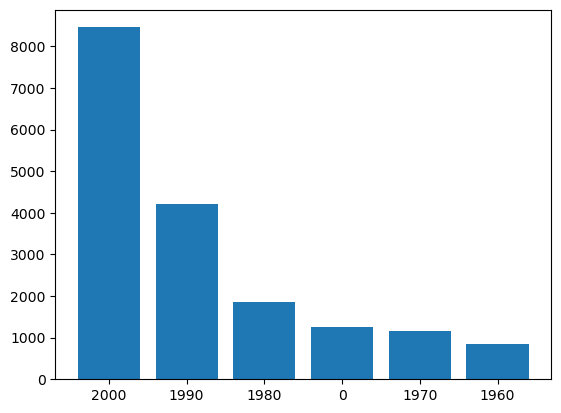

In [31]:
plt.bar((content['decade'].value_counts(sort=True).index), (content['decade'].value_counts(sort=True).values))

# content feature selection

to minimize bias, i'm only going to add the decade column to the data i will use for modeling.

In [32]:
decade = content[['id', 'decade']]
decade = decade.rename(columns = {'id': 'mid', 'decade': 'm_decade'})
decade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mid       17770 non-null  int64 
 1   m_decade  17770 non-null  object
dtypes: int64(1), object(1)
memory usage: 277.8+ KB


# ratings

importing partial datasets as csvs for ease of use

In [2]:
d1 = pd.read_csv('data/d1_clean.csv')
d1 = d1.drop(['Unnamed: 0'], axis=1)

d2 = pd.read_csv('data/d2_clean.csv')
d2 = d2.drop(['Unnamed: 0'], axis=1)

d3 = pd.read_csv('data/d3_clean.csv')
d3 = d3.drop(['Unnamed: 0'], axis = 1)

d4 = pd.read_csv('data/d4_clean.csv')
d4 = d4.drop(['Unnamed: 0'], axis =1)

In [3]:
%notify

<IPython.core.display.Javascript object>

In [4]:
df = pd.concat([d1, d2, d3, d4], axis =0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   mid      int64  
 1   cust_id  int64  
 2   rating   float64
 3   date     object 
 4   year     int64  
 5   month    int64  
 6   day      int64  
 7   fisc_Q   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.0+ GB


In [5]:
%notify

<IPython.core.display.Javascript object>

In [6]:
df.head()

,mid,cust_id,rating,date,year,month,day,fisc_Q
0,1,1488844,3.0,2005-09-06,2005,9,6,4
1,1,822109,5.0,2005-05-13,2005,5,13,2
2,1,885013,4.0,2005-10-19,2005,10,19,4
3,1,30878,4.0,2005-12-26,2005,12,26,4
4,1,823519,3.0,2004-05-03,2004,5,3,2


In [7]:
#sanity check: where d1 and d2 end, making sure the index is correct
#mid 9210, cust id 627867, rating 3
df.iloc[51031354]

mid              9210
cust_id        627867
rating            3.0
date       2005-05-02
year             2005
month               5
day                 2
fisc_Q              2
Name: 51031354, dtype: object

In [8]:
#dropping day and month because i changed my mind
df = df.drop(['day', 'month'], axis=1)

#rename columns to avoid 'm_decade' confusion
df = df.rename(columns = {'date': 'r_date', 'year': 'r_year', 'fisc_Q': 'r_fiscQ'})
df.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ
0,1,1488844,3.0,2005-09-06,2005,4
1,1,822109,5.0,2005-05-13,2005,2
2,1,885013,4.0,2005-10-19,2005,4
3,1,30878,4.0,2005-12-26,2005,4
4,1,823519,3.0,2004-05-03,2004,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   mid      int64  
 1   cust_id  int64  
 2   rating   float64
 3   r_date   object 
 4   r_year   int64  
 5   r_fiscQ  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.5+ GB


In [12]:
df['r_date'] = df['r_date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   mid      int64         
 1   cust_id  int64         
 2   rating   float64       
 3   r_date   datetime64[ns]
 4   r_year   int64         
 5   r_fiscQ  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.5 GB


In [13]:
df = df.sort_values(by=['r_date'])
df

,mid,cust_id,rating,r_date,r_year,r_fiscQ
56431994,10341,510180,4.0,1999-11-11,1999,4
9056171,1798,510180,5.0,1999-11-11,1999,4
58698779,10774,510180,3.0,1999-11-11,1999,4
48101611,8651,510180,2.0,1999-11-11,1999,4
81893208,14660,510180,2.0,1999-11-11,1999,4
...,...,...,...,...,...,...
49939086,8993,2183787,4.0,2005-12-31,2005,4
42072268,7430,258170,4.0,2005-12-31,2005,4
47098649,8467,1534359,5.0,2005-12-31,2005,4
55621336,10168,2543295,2.0,2005-12-31,2005,4


In [14]:
%notify

<IPython.core.display.Javascript object>

In [16]:
df['r_year'].value_counts()

r_year
2005    53250073
2004    30206574
2003     9985337
2002     4342871
2001     1769031
2000      924443
1999        2178
Name: count, dtype: int64

In [64]:
df = df[(df['r_year'] >= 2004)]

In [18]:
%notify

<IPython.core.display.Javascript object>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83456647 entries, 34867501 to 25464092
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   mid      int64         
 1   cust_id  int64         
 2   rating   float64       
 3   r_date   datetime64[ns]
 4   r_year   int64         
 5   r_fiscQ  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.4 GB


In [66]:
df['mid'].value_counts()

mid
15205    196397
1905     186107
5317     183465
15124    171416
6287     158851
          ...  
13755         3
5429          2
3100          2
6998          2
7700          1
Name: count, Length: 17769, dtype: int64

In [67]:
data = df.merge(decade)
data.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade
0,6249,1110911,5.0,2004-01-01,2004,1,1990
1,6249,2040249,4.0,2004-01-02,2004,1,1990
2,6249,223533,4.0,2004-01-02,2004,1,1990
3,6249,1092005,4.0,2004-01-04,2004,1,1990
4,6249,808435,4.0,2004-01-04,2004,1,1990


In [68]:
data['mid'].value_counts()

mid
15205    196397
1905     186107
5317     183465
15124    171416
6287     158851
          ...  
13755         3
5429          2
3100          2
6998          2
7700          1
Name: count, Length: 17769, dtype: int64

# Ready for EDA

In [38]:
data.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade
0,14943,2278539,3.0,2003-01-01,2003,1,1970
1,14943,1208452,1.0,2003-01-01,2003,1,1970
2,14943,460006,4.0,2003-01-02,2003,1,1970
3,14943,525945,3.0,2003-01-02,2003,1,1970
4,14943,2131029,3.0,2003-01-02,2003,1,1970


## Exploring content attributes

- highest rated content (content quality)
- most rated content (popularity)
- decade frequency distribution SEEN ABOVE

### Looking at rating as a popularity metric - speaks to the perceived quality of the content

**1. Does rating correlate with decade of release?**

In [39]:
contenteda = data.copy()
avgrating = contenteda.groupby('mid')['rating'].mean().sort_values(ascending=False).to_frame()

In [40]:
#average rating for each content piece
avgrating = avgrating.rename(columns = {'rating': 'm_avg_rating'}).reset_index()
avgrating

,mid,m_avg_rating
0,14961,4.723270
1,7230,4.716611
2,7057,4.702611
3,3456,4.670989
4,9864,4.638809
...,...,...
17764,17577,1.400000
17765,17429,1.396761
17766,11768,1.375610
17767,16487,1.346021


In [41]:
contenteda = contenteda.merge(avgrating, how = 'outer')
contenteda.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade,m_avg_rating
0,14943,2278539,3.0,2003-01-01,2003,1,1970,3.57735
1,14943,1208452,1.0,2003-01-01,2003,1,1970,3.57735
2,14943,460006,4.0,2003-01-02,2003,1,1970,3.57735
3,14943,525945,3.0,2003-01-02,2003,1,1970,3.57735
4,14943,2131029,3.0,2003-01-02,2003,1,1970,3.57735


In [42]:
%notify

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='m_decade', ylabel='m_avg_rating'>

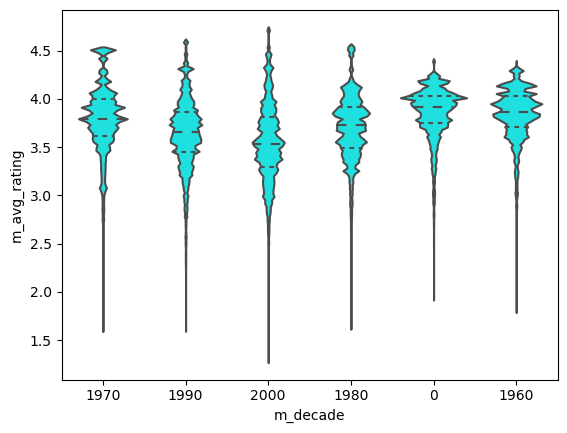

In [43]:
sns.violinplot(
    y="m_avg_rating", 
    x="m_decade", 
    data=contenteda, 
    color='aqua',
    inner="quartile",  # Seeing the mean and quartiles
)


In [44]:
contenteda.groupby('m_decade')['rating'].mean().sort_values(ascending=False)

m_decade
0       3.863781
1960    3.840272
1970    3.794723
1980    3.706411
1990    3.647955
2000    3.553521
Name: rating, dtype: float64

There's not a signigicant difference in the way that users enjoy content from a particular decade.

**2. What is the distribution of content ratings?**

In [47]:
avgrating.describe()

,mid,m_avg_rating
count,17769.000000,17769.000000
mean,8885.214981,3.246409
std,5129.905127,0.519625
min,1.000000,1.287879
25%,4443.000000,2.919173
50%,8885.000000,3.273103
75%,13327.000000,3.627735
max,17770.000000,4.723270


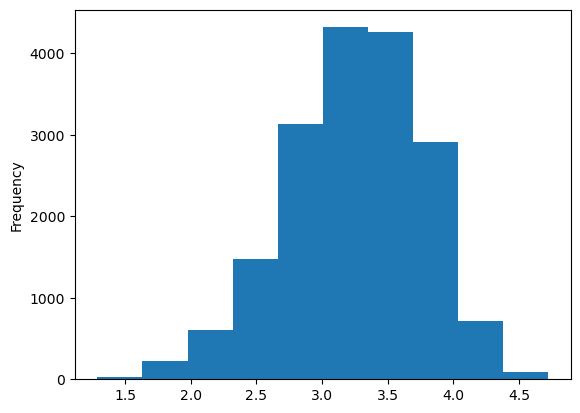

In [48]:
#looks at distribution of avg rating per movie
avgrating['m_avg_rating'].plot(kind='hist');

Average rating skews slightly to the left. Average rating of 3.2 out of 5 for a content is a good sign.

Binning content quality.

In [49]:
#distribution is pretty normal, going to bin into 'quality grade' quartiles

def quality(row):
    """
    bins content based on their average ratings
    """
    if row['m_avg_rating'] < 2.9:
        return 1
    elif 2.9 <= row['m_avg_rating'] < 3.3:
        return 2
    elif 3.3 <= row['m_avg_rating'] < 3.6:
        return 3
    else:
        return 4

In [50]:
avgrating['m_quality'] = avgrating.apply(quality, axis=1)
avgrating

,mid,m_avg_rating,m_quality
0,14961,4.723270,4
1,7230,4.716611,4
2,7057,4.702611,4
3,3456,4.670989,4
4,9864,4.638809,4
...,...,...,...
17764,17577,1.400000,1
17765,17429,1.396761,1
17766,11768,1.375610,1
17767,16487,1.346021,1


In [51]:
# adding content quality as a feature
data = data.merge(avgrating[['mid', 'm_quality']], how='outer')
data.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade,m_quality
0,14943,2278539,3.0,2003-01-01,2003,1,1970,3
1,14943,1208452,1.0,2003-01-01,2003,1,1970,3
2,14943,460006,4.0,2003-01-02,2003,1,1970,3
3,14943,525945,3.0,2003-01-02,2003,1,1970,3
4,14943,2131029,3.0,2003-01-02,2003,1,1970,3


In [53]:
data

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade,m_quality
0,14943,2278539,3.0,2003-01-01,2003,1,1970,3
1,14943,1208452,1.0,2003-01-01,2003,1,1970,3
2,14943,460006,4.0,2003-01-02,2003,1,1970,3
3,14943,525945,3.0,2003-01-02,2003,1,1970,3
4,14943,2131029,3.0,2003-01-02,2003,1,1970,3
...,...,...,...,...,...,...,...,...
93441979,6256,1227322,1.0,2005-12-16,2005,4,2000,1
93441980,6256,2439493,2.0,2005-12-19,2005,4,2000,1
93441981,6256,2460347,1.0,2005-12-19,2005,4,2000,1
93441982,6256,2118461,3.0,2005-12-20,2005,4,2000,1


**3. What is the distribution of rating count? Does higher rating count indicate higher quality?**

In [54]:
popularity = data.groupby('mid')['rating'].count().sort_values(ascending=False).to_frame()
popularity.describe()

,rating
count,17769.000000
mean,5258.708087
std,15854.681713
min,3.000000
25%,178.000000
50%,534.000000
75%,2494.000000
max,212333.000000


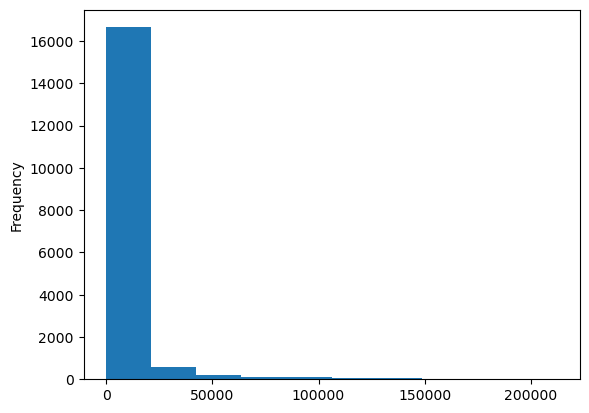

In [55]:
#looks at distribution of avg # of ratings per content
popularity['rating'].plot(kind='hist');

### thoughts on content attributes

- popularity: the avg content had 561 ratings, though it can range up to 233k ratings. will have to address popularity bias in my models

- quality: i'm certain that quality directly impacts consumer experience so I made it a feature i'd like to keep an eye on

- decade: grouping by decade rather than year released is more meaningful in that it also describes potential stylistic preferences or nostalgia/emotional attachments


## user behavior

most active users

In [56]:
users = data.groupby('cust_id')['rating'].count().sort_values(ascending=False).to_frame()
users.describe()

,rating
count,479100.000000
mean,195.036493
std,280.371848
min,1.000000
25%,37.000000
50%,91.000000
75%,243.000000
max,17436.000000


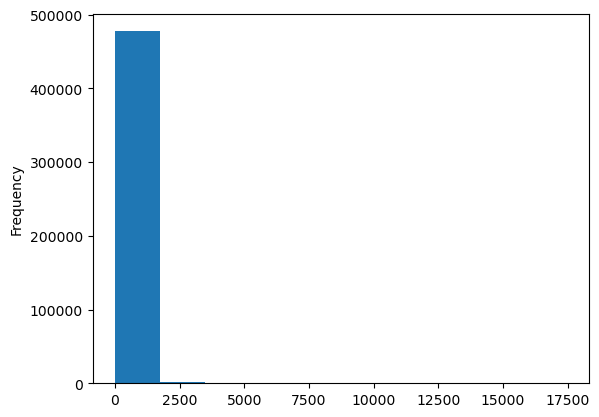

In [57]:
#looks at distribution of avg # of ratings per user
users['rating'].plot(kind='hist');

In [58]:
def activity(row):
    
    """
    bins users by activity level
    """
    if row['rating'] < 39:
        return 1
    elif 39 <= row['rating'] < 96:
        return 2
    elif 96 <= row['rating'] < 259:
        return 3
    elif 259 <= row['rating'] < 17653:
        return 4
    else:
        return 5

In [59]:
users['cust_act_rank'] = users.apply(activity, axis=1)
users.head()

,rating,cust_act_rank
cust_id,,
387418,17436,4
305344,16425,4
2439493,15891,4
1664010,15813,4
2118461,14831,4


In [60]:
users['cust_act_rank'].value_counts()

cust_act_rank
1    125225
3    121731
2    119772
4    112372
Name: count, dtype: int64

<BarContainer object of 4 artists>

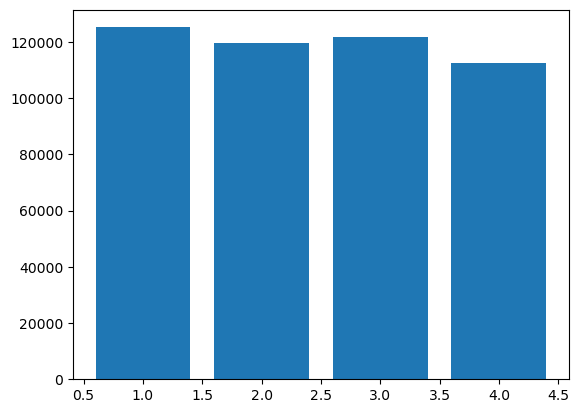

In [61]:
plt.bar((users['cust_act_rank'].value_counts(sort=True).index), 
        (users['cust_act_rank'].value_counts(sort=True).values))

In [62]:
data.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,m_decade,m_quality
0,14943,2278539,3.0,2003-01-01,2003,1,1970,3
1,14943,1208452,1.0,2003-01-01,2003,1,1970,3
2,14943,460006,4.0,2003-01-02,2003,1,1970,3
3,14943,525945,3.0,2003-01-02,2003,1,1970,3
4,14943,2131029,3.0,2003-01-02,2003,1,1970,3


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93441984 entries, 0 to 93441983
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   mid        int64         
 1   cust_id    int64         
 2   rating     float64       
 3   r_date     datetime64[ns]
 4   r_year     int64         
 5   r_fiscQ    int64         
 6   m_decade   object        
 7   m_quality  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 5.6+ GB


In [76]:
data = data.drop(['r_year'], axis=1)
data.head()

,mid,cust_id,rating,r_date,r_fiscQ,m_decade,m_quality
0,1,1488844,3.0,2005-09-06,4,2000,a
1,1,822109,5.0,2005-05-13,2,2000,a
2,1,885013,4.0,2005-10-19,4,2000,a
3,1,30878,4.0,2005-12-26,4,2000,a
4,1,823519,3.0,2004-05-03,2,2000,a


In [78]:
data['r_date'] = data['r_date'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   mid        int64         
 1   cust_id    int64         
 2   rating     float64       
 3   r_date     datetime64[ns]
 4   r_fiscQ    int64         
 5   m_decade   object        
 6   m_quality  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.2+ GB


In [79]:
data.to_csv('data/final_df.csv')

In [80]:
%notify

<IPython.core.display.Javascript object>

In [ ]:
d['month_year'] = df['r_date'].dt.to_period('M')
df.head()

In [ ]:
ratings_monthly = df[['month_year', 'rating']]
ratings_monthly.head()

In [64]:
plt.bar((users['cust_act_rank'].value_counts(sort=True).index), (users['cust_act_rank'].value_counts(sort=True).values

SyntaxError: unexpected EOF while parsing (338409898.py, line 2)

In [ ]:
data = data.merge(users[['cust_activity_rank']])

In [ ]:
plt.bar((data['r_year'].value_counts(sort=True).index), (data['r_year'].value_counts(sort=True).values))

In [ ]:
plt.bar((df['r_fiscQ'].value_counts(sort=True).index), (df['r_fiscQ'].value_counts(sort=True).values))

In [ ]:
y05 = df[(df['r_year'] == 2005)]
y05['r_month'].value_counts()

In [ ]:
plt.bar((y05['r_month'].value_counts(sort=True).index), (y05['r_month'].value_counts(sort=True).values))

In [ ]:
y03 = df[(df['r_year'] == 2003)]
y03['r_month'].value_counts()

In [ ]:
plt.bar((y03['r_month'].value_counts(sort=True).index), (y03['r_month'].value_counts(sort=True).values))

In [ ]:
y0 = df[(df['r_year'] == 1999)]
y0['r_month'].value_counts()

In [44]:
%notify

<IPython.core.display.Javascript object>

In [ ]:
y02 = df[(df['r_year'] == 2002)]
y02['r_month'].value_counts()

In [ ]:
plt.bar((y02['r_month'].value_counts(sort=True).index), (y02['r_month'].value_counts(sort=True).values))

# thoughts on time

After looking at the data, it seems like using time periods to cluster customers might be unreliable. First, these are randomly chosen so it might not represent accurately the distribution of time watched. 

Also, I can't tell from this data whether someone rated the movie at the time of watch or whether they rated it having already watched it. 

I'll leave year and fiscal quarters in because it does provide some context into seasonality. 